# Introduction

This notebook presents **Convolutional Neural Network** applied to [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset.

**Contents**

* [CIFAR-10 Dataset](#CIFAR-10-Dataset) - load and preprocess dataset
* [Keras Model](#Keras-Model) - make and train model

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Limit TensorFlow GPU memory usage


In [2]:
import tensorflow as tf

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
with tf.Session(config=config):
    pass  # init sessin with allow_growth

# CIFAR-10 Dataset

Load dataset and show example images

In [3]:
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = tf.keras.datasets.cifar10.load_data()
class2txt = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Show example images

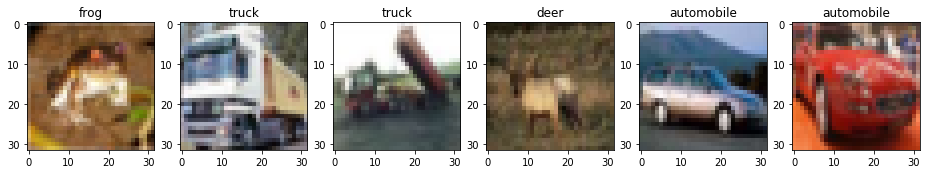

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=[16, 9])
for i in range(len(axes)):
    axes[i].set_title(class2txt[y_train_raw[i, 0]])
    axes[i].imshow(x_train_raw[i])

Normalize features

In [5]:
x_train = (x_train_raw - x_train_raw.mean()) / x_train_raw.std()
x_test = (x_test_raw - x_train_raw.mean()) / x_train_raw.std()
print('x_train.shape', x_train.shape)
print('x_test.shape', x_test.shape)

x_train.shape (50000, 32, 32, 3)
x_test.shape (10000, 32, 32, 3)


One-hot encode labels

In [6]:
y_train = tf.keras.utils.to_categorical(y_train_raw, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test_raw, num_classes=10)
print('y_train.shape', y_train.shape)
print(y_train[:3])

y_train.shape (50000, 10)
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


# Keras Model

In [7]:
from tensorflow.keras.layers import Input, InputLayer, Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout

*Option #1:* define ConvNet model using **Keras Sequential API**

In [8]:
# model = tf.keras.Sequential()
# model.add(InputLayer(input_shape=[32, 32, 3]))

# model.add(Conv2D(filters=16, kernel_size=3, padding='same', activation='elu'))
# model.add(MaxPooling2D(pool_size=[2,2], strides=[2, 2], padding='same'))

# model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='elu'))
# model.add(MaxPooling2D(pool_size=[2,2], strides=[2, 2], padding='same'))

# model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='elu'))
# model.add(MaxPooling2D(pool_size=[2,2], strides=[2, 2], padding='same'))

# model.add(Flatten())
# model.add(Dropout(0.2))

# model.add(Dense(512, activation='elu'))
# model.add(Dropout(0.2))

# model.add(Dense(10, activation='softmax'))

*Option #2:* define ConvNet using **Keras Functional API** (both options produce identical models)

In [9]:
X_input = Input(shape=[32, 32, 3])

X = Conv2D(filters=16, kernel_size=3, padding='same', activation='elu')(X_input)
X = MaxPooling2D(pool_size=[2,2], strides=[2, 2], padding='same')(X)

X = Conv2D(filters=32, kernel_size=3, padding='same', activation='elu')(X)
X = MaxPooling2D(pool_size=[2,2], strides=[2, 2], padding='same')(X)

X = Conv2D(filters=64, kernel_size=3, padding='same', activation='elu')(X)
X = MaxPooling2D(pool_size=[2,2], strides=[2, 2], padding='same')(X)

X = Flatten()(X)
X = Dropout(0.2)(X)

X = Dense(512, activation='elu')(X)
X = Dropout(0.2)(X)

X = Dense(10, activation='softmax')(X)

model = tf.keras.Model(inputs=X_input, outputs=X)

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
__________

Train model

In [11]:
hist = model.fit(x=x_train, y=y_train, batch_size=250, epochs=20,
                 validation_data=(x_test, y_test), verbose=2)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
 - 5s - loss: 1.4129 - acc: 0.5008 - val_loss: 1.1457 - val_acc: 0.5958
Epoch 2/20
 - 3s - loss: 1.1033 - acc: 0.6150 - val_loss: 1.0347 - val_acc: 0.6393
Epoch 3/20
 - 3s - loss: 1.0054 - acc: 0.6496 - val_loss: 0.9811 - val_acc: 0.6618
Epoch 4/20
 - 3s - loss: 0.9323 - acc: 0.6720 - val_loss: 0.9238 - val_acc: 0.6803
Epoch 5/20
 - 3s - loss: 0.8743 - acc: 0.6990 - val_loss: 0.8849 - val_acc: 0.6973
Epoch 6/20
 - 3s - loss: 0.8233 - acc: 0.7104 - val_loss: 0.8547 - val_acc: 0.7057
Epoch 7/20
 - 3s - loss: 0.7782 - acc: 0.7278 - val_loss: 0.8142 - val_acc: 0.7202
Epoch 8/20
 - 3s - loss: 0.7358 - acc: 0.7420 - val_loss: 0.7897 - val_acc: 0.7288
Epoch 9/20
 - 3s - loss: 0.6934 - acc: 0.7556 - val_loss: 0.7827 - val_acc: 0.7314
Epoch 10/20
 - 3s - loss: 0.6513 - acc: 0.7698 - val_loss: 0.7596 - val_acc: 0.7386
Epoch 11/20
 - 3s - loss: 0.6129 - acc: 0.7851 - val_loss: 0.7585 - val_acc: 0.7433
Epoch 12/20
 - 3s - loss: 0.5842 - 

**Final Results**

**NOTE:** Keras calculates training loss differently than validation loss, from documentation ([source](https://keras.io/getting-started/faq/#why-is-the-training-loss-much-higher-than-the-testing-loss)):

> **Why is the training loss much higher than the testing loss?**
> 
> A Keras model has two modes: training and testing. Regularization mechanisms, such as Dropout and L1/L2 weight regularization, are turned off at testing time.
> 
> Besides, the training loss is the average of the losses over each batch of training data. Because your model is changing over time, the loss over the first batches of an epoch is generally higher than over the last batches. On the other hand, the testing loss for an epoch is computed using the model as it is at the end of the epoch, resulting in a lower loss.

This is why train loss/accuracy below are much better than ones calcualted during training. This also why initially during training train loss is higher than validation loss.

Final results

In [12]:
loss, acc = model.evaluate(x_train, y_train, batch_size=250, verbose=0)
print(f'Accuracy on train set: {acc:.3f}')
loss, acc = model.evaluate(x_test, y_test, batch_size=250, verbose=0)
print(f'Accuracy on test set:  {acc:.3f}')

Accuracy on train set: 0.954
Accuracy on test set:  0.768


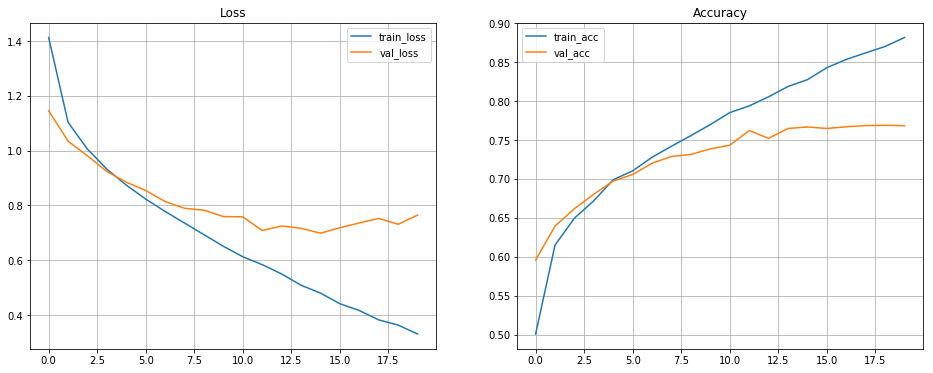

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[16, 6])
axes[0].plot(hist.history['loss'], label='train_loss')
axes[0].plot(hist.history['val_loss'], label='val_loss')
axes[0].set_title('Loss')
axes[0].legend()
axes[0].grid()
axes[1].plot(hist.history['acc'], label='train_acc')
axes[1].plot(hist.history['val_acc'], label='val_acc')
axes[1].set_title('Accuracy')
axes[1].legend()
axes[1].grid()

Looks like we have a bit of overfitting issue